In [69]:

# CV2 for Image processing
# Numpy for Array Processing
# OS for dealing with directory
# keras for Image augmentation and model making
# matplotlib.pyplot for plottting the image and graphs  



import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os  


In [60]:
#Defining Location
#Our Data Set Consist of  (car person and motorbike Images) i.e labelled Data
loc=r'natural-images'

# Dealing with Images Using Opencv and matplotlib

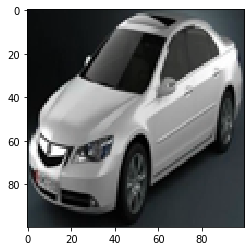

In [28]:

l=r'natural-images/car_0001.jpg'  #location of unknown image

i=cv2.imread(l)   #function used to read pixels of image
#i   #showing the pixels of that image

plt.imshow(i)  #plotting the image
plt.show()     #showing the image

# Concept Of Slicing

In [61]:
name='car_0674.jpg'    #slicing the list
name.split('_')        #Splitting

['car', '0674.jpg']

# OS library and its functions 

In [62]:
#Importing OS Library for dealing with the Directory(ALL Files at the same time )
import os

os.listdir(loc)  #Listdir displays all files in current directory


['car_0000.jpg',
 'car_0001.jpg',
 'car_0002.jpg',
 'car_0003.jpg',
 'car_0004.jpg',
 'car_0005.jpg',
 'car_0006.jpg',
 'car_0007.jpg',
 'car_0008.jpg',
 'car_0009.jpg',
 'car_0010.jpg',
 'car_0011.jpg',
 'car_0012.jpg',
 'car_0013.jpg',
 'car_0014.jpg',
 'car_0015.jpg',
 'car_0016.jpg',
 'car_0017.jpg',
 'car_0018.jpg',
 'car_0019.jpg',
 'car_0020.jpg',
 'car_0021.jpg',
 'car_0022.jpg',
 'car_0023.jpg',
 'car_0024.jpg',
 'car_0025.jpg',
 'car_0026.jpg',
 'car_0027.jpg',
 'car_0028.jpg',
 'car_0029.jpg',
 'car_0030.jpg',
 'car_0031.jpg',
 'car_0032.jpg',
 'car_0033.jpg',
 'car_0034.jpg',
 'car_0035.jpg',
 'car_0036.jpg',
 'car_0037.jpg',
 'car_0038.jpg',
 'car_0039.jpg',
 'car_0040.jpg',
 'car_0041.jpg',
 'car_0042.jpg',
 'car_0043.jpg',
 'car_0044.jpg',
 'car_0045.jpg',
 'car_0046.jpg',
 'car_0047.jpg',
 'car_0048.jpg',
 'car_0049.jpg',
 'car_0050.jpg',
 'car_0051.jpg',
 'car_0052.jpg',
 'car_0053.jpg',
 'car_0054.jpg',
 'car_0055.jpg',
 'car_0056.jpg',
 'car_0057.jpg',
 'car_0058.jpg

In [63]:
os.path.join(loc,'car_0674.jpg')  #joining the path using join command

'natural-images\\car_0674.jpg'

# Extracing Labels from set of images using slicing concept

In [34]:
label=[]
#os is library used to list down all the files in directory 
# used for dealing with directory
for i in os.listdir(loc):
    if i.split('_')[0]=='car':
        label.append(0)
    elif i.split('_')[0]=='motorbike':
        label.append(1)
    if i.split('_')[0]=='cat':
        label.append(2)
    if i.split('_')[0]=='person':
        label.append(3)
    
        
#we are separating labels

# Extracing Labels from set of images using slicing concept

In [35]:
#features we require now
features=[]
for i in os.listdir(loc):
    f=cv2.imread(os.path.join(loc,i))
    resized_f=cv2.resize(f,(70,70))   #resizing all imgaes
    features.append(resized_f)

# Getting Dataset into Variables

In [36]:
import numpy as np
X=np.array(features)/255  #normalizing the pixel values
Y=np.array(label)

# Splitting the Data set into test and train

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

# Using sequential Model of Keras

In [38]:
#tensor flow is frame work 
#keras and tflearn are libraries

# Defining the  model

In [39]:
#to use keras first you have to define model
model=tf.keras.models.Sequential()

In [40]:
#Dense is used to define how many neurons will be used
#input layers
#features dim are not known:use flatten
#features din are known: put into dense as 2d array
model.add(tf.keras.layers.Flatten())



#hidden layers(2)
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))



#output layers 
model.add(tf.keras.layers.Dense(4,activation ='softmax'))


In [41]:
# in categorial entropy you have to define data in form of binary 
#whereas in case of sparse you have to not
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

# Fitting the model

In [64]:
model.fit(xtrain,ytrain,epochs=20)   #Trainig accuracy

Epoch 1/20
2720/2720 [==============================] - 2s 775us/sample - loss: 0.1729 - acc: 0.9401
Epoch 2/20
2720/2720 [==============================] - 2s 686us/sample - loss: 0.1381 - acc: 0.9533
Epoch 3/20
2720/2720 [==============================] - 2s 672us/sample - loss: 0.1495 - acc: 0.9474
Epoch 4/20
2720/2720 [==============================] - 2s 675us/sample - loss: 0.1141 - acc: 0.9625
Epoch 5/20
2720/2720 [==============================] - 2s 712us/sample - loss: 0.0967 - acc: 0.9702
Epoch 6/20
2720/2720 [==============================] - 2s 708us/sample - loss: 0.0809 - acc: 0.9757
Epoch 7/20
2720/2720 [==============================] - 2s 699us/sample - loss: 0.0850 - acc: 0.9732
Epoch 8/20
2720/2720 [==============================] - 2s 758us/sample - loss: 0.0874 - acc: 0.9717s - loss: 0
Epoch 9/20
2720/2720 [==============================] - 2s 710us/sample - loss: 0.1343 - acc: 0.9676
Epoch 10/20
2720/2720 [==============================] - 2s 760us/sample - loss:

# Using Save Model (If Needed)

In [65]:
model.save('model.h5')          # saving Model

In [68]:
from keras.model import load_model  # reusing the model
model=load_model('model.h5')

# Predicting test cases (Checking Manually)

In [55]:
       
predtn=np.argmax(model.predict(xtest[40].reshape(1,-1)))
if predtn==0:               #np.argmax returns index of maximum argument
   print("car")          #model.predict predicts the category
if predtn==1:
   print("motorbike") 
if predtn==2:
   print("cat") 
if predtn==3:
   print("person") 


car


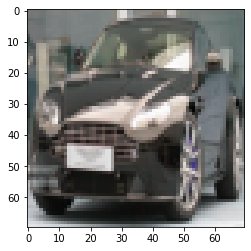

In [56]:
#plotting the predicted Value TO check 
import matplotlib.pyplot as plt
plt.imshow(xtest[40].reshape(70,70,3)) 
plt.show()

# GUI

In [59]:
import tkinter as tk             
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image,ImageOps 
import numpy
import tensorflow as tf
#load the trained model to classify persons
from keras.models import load_model
#if os.path.exists('{}.meta'.format(MODEL_NAME)):
 #   model.load(MODEL_NAME)
  #  print('model loaded!')


#dictionary to label all Persons.
classes = { 1:'car',
            2:'motorbike', 
            3:'cat', 
            4:'person', 
  }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification')
top.configure(background='#00ffff')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    
    image = Image.open(file_path)
    p=cv2.imread(file_path,0)
    resized_p=cv2.resize(p,(70,70)) 
    #image=cv2.imread(file_path,0)
    #image = ImageOps.greyscale(image) 
    #image = image.resize((70,70))
    

    #image = numpy.expand_dims(resized_p, axis=0)
    image = numpy.array(resized_p).reshape(1,70,70,1)
    image=image/255
    print(image.shape)
    #image=image.reshape(70,70,1)
    
    
    pred =np.argmax(model.predict(image)[0])
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify ",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Guess",pady=20, font=('arial',23,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()
    

(1, 70, 70, 1)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\harsh\anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-59-65d7a330ec39>", line 50, in <lambda>
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
  File "<ipython-input-59-65d7a330ec39>", line 45, in classify
    pred =np.argmax(model.predict(image)[0])
  File "C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1113, in predict
    self, x, batch_size=batch_size, verbose=verbose, steps=steps)
  File "C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_arrays.py", line 329, in model_iteration
    batch_outs = f(ins_batch)
  File "C:\Users\harsh\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py", line 3076, in __call__
    run_metadata=self.run_metadata)
  File "C:\Users\harsh\anaconda3\lib\site-packages\tensorflow